c:\Users\josep\OneDrive\Desktop\ML2_Project\AdversarialRobustnessML\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\josep\OneDrive\Desktop\ML2_Project\AdversarialRobustnessML\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


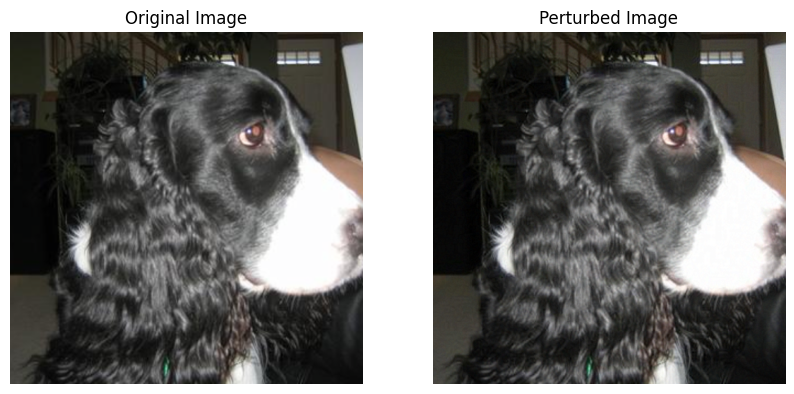

In [15]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained GoogleNet model and send it to the GPU
model = models.googlenet(pretrained=True).cuda()
model.eval()

# Load an image from a file and send it to the GPU
image_path = 'C:\\Users\\josep\\OneDrive\\Desktop\\ML2_Project\\AdversarialRobustnessML\\DataFiles\\ImageNet\\Original\\imagenette2-320\\train\\n02102040\\ILSVRC2012_val_00012689.JPEG'
img = Image.open(image_path)

# Define a transform to preprocess the image
preprocess = transforms.Compose([
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = preprocess(img).unsqueeze(0).cuda()  # Add a batch dimension and send to GPU

# Function to perform FGSM attack with clipping
def fgsm_attack(image, epsilon, targetclass, model):
    image.requires_grad = True
    output = model(image)
    model.zero_grad()
    loss = -output[0, targetclass]  # Use the original image's class for the loss
    loss.backward()
    perturbed_image = image + epsilon * image.grad.sign()
    return perturbed_image

# Specify the target class for the attack
original_class = 5  # Change this to your desired target class

# Set the value of epsilon for the FGSM attack (smaller values are less noticeable)
epsilon = 0.03

# Perform FGSM attack with clipping
perturbed_image = fgsm_attack(img, epsilon, original_class, model)

# Convert tensors to NumPy arrays for visualization
original_image_np = img.squeeze(0).detach().cpu().numpy()
perturbed_image_np = perturbed_image.squeeze(0).detach().cpu().numpy()

# Undo normalization (multiply by standard deviation and add the mean for each channel)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

original_image_np = (original_image_np * np.array(std).reshape(3, 1, 1)) + np.array(mean).reshape(3, 1, 1)
perturbed_image_np = (perturbed_image_np * np.array(std).reshape(3, 1, 1)) + np.array(mean).reshape(3, 1, 1)

# Ensure the perturbed image is within the valid range [0, 1]
original_image_np = np.clip(original_image_np, 0, 1)
perturbed_image_np = np.clip(perturbed_image_np, 0, 1)

# Display the original and perturbed images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(np.transpose(original_image_np, (1, 2, 0)))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Perturbed Image')
plt.imshow(np.transpose(perturbed_image_np, (1, 2, 0)))
plt.axis('off')

plt.show()


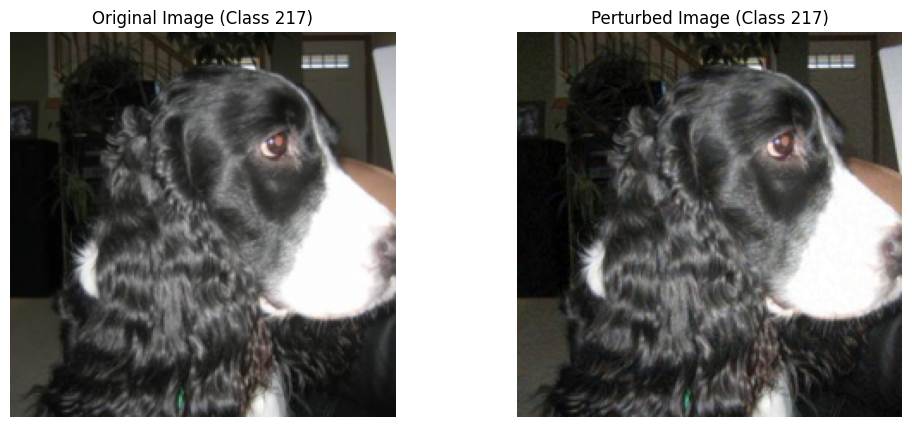

In [16]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained GoogleNet model and send it to the GPU
model = models.googlenet(pretrained=True).cuda()
model.eval()

# Load an image from a file and send it to the GPU
image_path = 'C:\\Users\\josep\\OneDrive\\Desktop\\ML2_Project\\AdversarialRobustnessML\\DataFiles\\ImageNet\\Original\\imagenette2-320\\train\\n02102040\\ILSVRC2012_val_00012689.JPEG'
img = Image.open(image_path)

# Define a transform to preprocess the image
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = preprocess(img).unsqueeze(0).cuda()  # Add a batch dimension and send to GPU

# Function to perform FGSM attack with clipping

def fgsm_attack(image, epsilon, targetclass, model):
    image.requires_grad = True
    output = model(image)
    model.zero_grad()
    loss = -output[0, targetclass]  # Use the original image's class for the loss
    loss.backward()
    perturbed_image = image + epsilon * image.grad.sign()
    return perturbed_image


# Specify the target class for the attack
original_class = 5  # Change this to your desired target class

# Set the value of epsilon for the FGSM attack (smaller values are less noticeable)
epsilon = 0.05

# Perform FGSM attack with clipping
perturbed_image = fgsm_attack(img, epsilon, original_class, model)

# Get the class labels for the original and perturbed images
with torch.no_grad():
    original_output = model(img)
    perturbed_output = model(perturbed_image)

original_class_label = torch.argmax(original_output).item()
perturbed_class_label = torch.argmax(perturbed_output).item()

# Convert tensors to NumPy arrays for visualization
original_image_np = img.squeeze(0).detach().cpu().numpy()
perturbed_image_np = perturbed_image.squeeze(0).detach().cpu().numpy()

# Undo normalization (multiply by standard deviation and add the mean for each channel)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

original_image_np = (original_image_np * np.array(std).reshape(3, 1, 1)) + np.array(mean).reshape(3, 1, 1)
perturbed_image_np = (perturbed_image_np * np.array(std).reshape(3, 1, 1)) + np.array(mean).reshape(3, 1, 1)

# Ensure the perturbed image is within the valid range [0, 1]
original_image_np = np.clip(original_image_np, 0, 1)
perturbed_image_np = np.clip(perturbed_image_np, 0, 1)

# Display the original and perturbed images and their respective class labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title(f'Original Image (Class {original_class_label})')
plt.imshow(np.transpose(original_image_np, (1, 2, 0)))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Perturbed Image (Class {perturbed_class_label})')
plt.imshow(np.transpose(perturbed_image_np, (1, 2, 0)))
plt.axis('off')

plt.show()
